# **Query SQL**

In [1]:
# from google.colab import auth
# from google.cloud import bigquery
# import pandas as pd
# auth.authenticate_user()
# print('Authenticated')

# project_id = "kisi-kisi-400611"
# client = bigquery.Client(project=project_id)

# df = client.query('''
# SELECT *
# FROM `ftds-hacktiv8-project.phase1_ftds_009_hck.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 1;
# ''').to_dataframe()

# df.to_csv("P1G6_Set_1_habibi.csv")

# **Import Libraries**

In [2]:
# mengimpor pustaka
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express  as px 
import pickle
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from matplotlib.ticker import FixedLocator, FixedFormatter

# **Data Loading**

In [3]:
df = pd.read_csv("P1G6_Set_1_habibi.csv")

In [4]:
# Tampilkan 10 data pertama
print("10 data pertama:")
df.head(10)

10 data pertama:


,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [5]:
# Tampilkan 10 data terakhir
print("10 data terakhir:")
df.tail(10)

10 data terakhir:


,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [6]:
# menghapus kolom dengan nama 'Unnamed: 0' dari DataFrame
del df['Unnamed: 0']

In [7]:
# Menggunakan df.info() untuk mendapatkan informasi tentang DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Exploratory Data Analysis (EDA)**

**visualisasi balance terhadap credit limit**

In [9]:
px.scatter(df, x='BALANCE', y="CREDIT_LIMIT", color="PURCHASES_FREQUENCY", title='Balance vs Credit Limit')


Terlihat bahwa semakin besar jumlah saldo untuk pembelian (balance) maka batasan kartu kredit akan semakin meningkat (credit limit)


**visualisasi balance terhadap purchase**

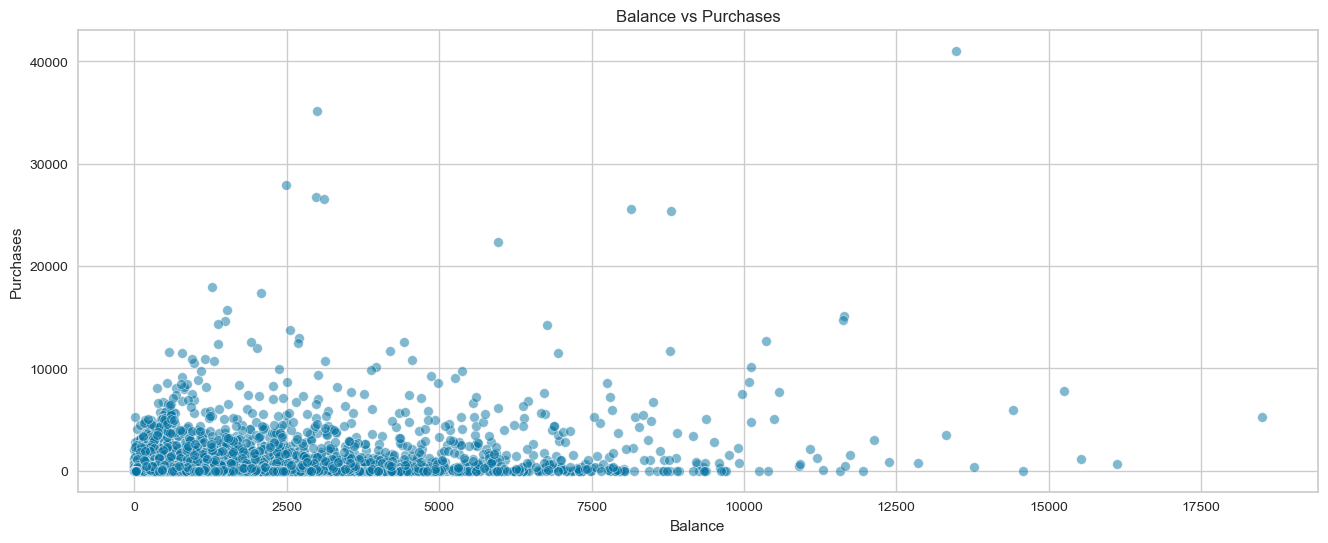

In [10]:
plt.figure(figsize=(16, 6))
plt.title('Balance vs Purchases')
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

Terlihat bahwa tidak terdapat hubungan antara jumlah saldo yang dimiliki seseorang dengan jumlah pembalian yang dilakukan. Hal ini menunjukan kebanyakan pemilik credit card cenderung hemat dalam berbelanja.



**visualisasi balance terhadap minimum payment**

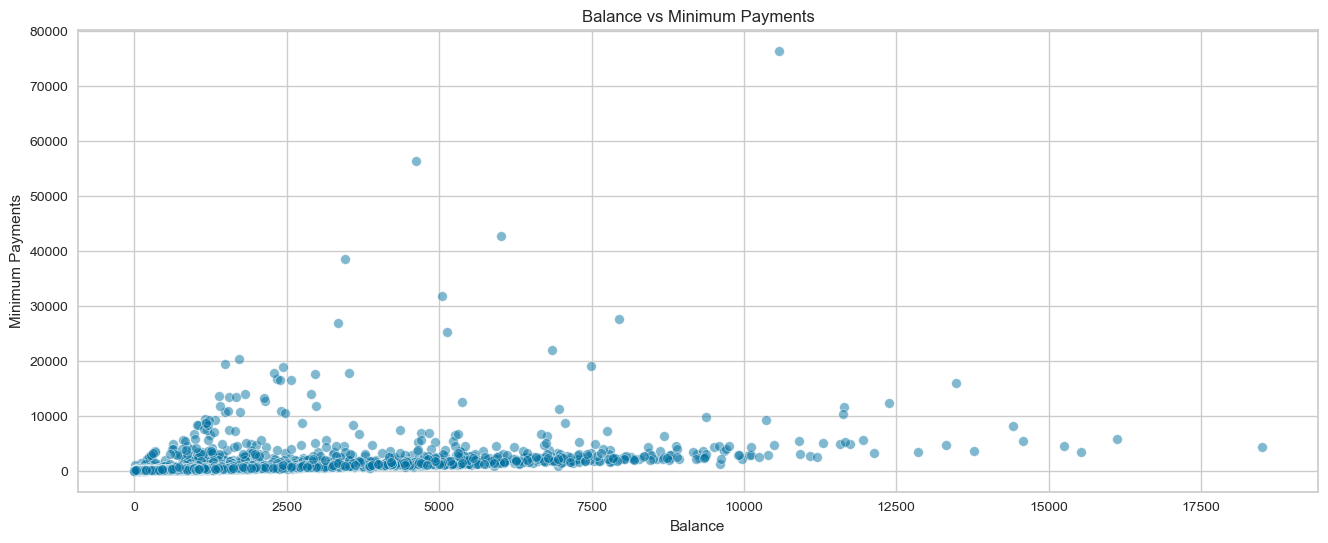

In [11]:
plt.figure(figsize=(16, 6))
plt.title('Balance vs Minimum Payments')
sns.scatterplot(data=df, x='BALANCE', y='MINIMUM_PAYMENTS', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Minimum Payments')
plt.show()

Terlihat bahwa semakin besar jumlah saldo yang dimiliki seseorang maka jumlah minimum pembayaran yang dilakukan juga tidak terlalu signifikant meningkat secara umum. Hal ini tentunya mendukung analisis kita terhadap grafik balance vs purchases


**visualisasi balance terhadap balance frequency**

In [12]:
px.scatter(df, x='BALANCE', y="BALANCE_FREQUENCY", color="TENURE", title='Balance vs Credit Limit')

Terlihat bahwa seseorang yang sering mengalami perubahan saldo (balance frequency) maka cenderung memiliki jumlah saldo semakin bertambah (balance)


**visualisasi balance terhadap oneoff purchase**

In [13]:
px.scatter(df, x='BALANCE', y="ONEOFF_PURCHASES", color="PURCHASES_FREQUENCY", title='Balance vs Credit Limit')


Terlihat bahwa seseorang yang sering mengalami perubahan saldo (balance frequency) maka cenderung memiliki jumlah saldo semakin bertambah (balance)

# **Feature Engineering**

In [14]:
df.drop(columns=['CUST_ID'], inplace=True, axis=1)

saya mendrop kolom CUST_ID dikarenakan menurut saya informasinya tidak terlalu penting untuk proses clustering annti

#### **Handling Outlier**

In [15]:
data = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
       ]]

#### **Handling Missing value**

In [16]:
data.duplicated().sum()

0

tidak ada data duplicate sehingga tidak usah di handling

In [17]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
dtype: int64

ada missing value pada data oleh karena itu saya akan handling

In [18]:
print((data[['MINIMUM_PAYMENTS']].isnull().sum()/4475)*100)

MINIMUM_PAYMENTS    3.463687
dtype: float64


missing value pada kolom minimum payments adalah 3 persen dan saya akan melakukan penghapusan nilai missing value

In [19]:
data2 = data.dropna()

In [20]:
#cek setelah handling missing value
data2.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

sekarang sudah tidak ada nilai missing value

In [21]:
# Membuat fungsi untuk memeriksa distribusi data
def check_skew(data2):
    data_numerik_normal = []
    data_numerik_non_normal = []
    
    for i in data2.columns:
        skewness = data2[i].skew()
        
        if (skewness >=0.5) | (skewness <=-0.5):
            data_numerik_non_normal.append(i)

        elif (skewness<0.5) & (skewness >=-0.5):
            data_numerik_normal.append(i)
        
        print(f"Skewness dari {i} adalah {skewness}")
    
    return data_numerik_normal, data_numerik_non_normal

# Melihat nilai skewness keseluruhan dengan memanggil fungsi check_skew
data_numerik_normal, data_numerik_non_normal = check_skew(data2)


Skewness dari BALANCE adalah 2.3060560083334405
Skewness dari BALANCE_FREQUENCY adalah -2.085655942874467
Skewness dari PURCHASES adalah 6.982698043897626
Skewness dari ONEOFF_PURCHASES adalah 9.827307004944023
Skewness dari INSTALLMENTS_PURCHASES adalah 6.252820447484483
Skewness dari CASH_ADVANCE adalah 5.611537241356356
Skewness dari PURCHASES_FREQUENCY adalah 0.030477479947374164
Skewness dari ONEOFF_PURCHASES_FREQUENCY adalah 1.5142430379734177
Skewness dari PURCHASES_INSTALLMENTS_FREQUENCY adalah 0.4891007516065457
Skewness dari CASH_ADVANCE_FREQUENCY adalah 1.8028579475499225
Skewness dari CASH_ADVANCE_TRX adalah 6.352409253171002
Skewness dari PURCHASES_TRX adalah 4.694066710265747
Skewness dari CREDIT_LIMIT adalah 1.487940822693631
Skewness dari PAYMENTS adalah 5.720098998110234
Skewness dari MINIMUM_PAYMENTS adalah 14.669771084332641
Skewness dari PRC_FULL_PAYMENT adalah 1.9189016413560516


In [22]:
print(f'data numerik normal :{data_numerik_normal}')
print(f'data numerik non normal :{data_numerik_non_normal}')

data numerik normal :['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
data numerik non normal :['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


memisahkan data yang normal dan data yang skewnes

In [23]:
Capping_normal = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= data_numerik_normal)

Capping_normal = Capping_normal.fit_transform(data2[data_numerik_normal])


melakukan capping dengan metode gaussian untuk data normal

In [24]:
Capping_non_normal = Winsorizer(capping_method='iqr', 
                             tail='both',
                             fold=3,
                             variables= data_numerik_non_normal,
                             missing_values='ignore')

Capping_non_normal = Capping_non_normal.fit_transform(data2[data_numerik_non_normal])

melakukan capping dengan metode iqr untuk data skew

In [25]:
# Menggabungkan data normal dan tidak normal yang sudah di capping untuk kita scaling
data_cleaned = pd.concat([Capping_normal,Capping_non_normal],axis = 1)
data_cleaned

,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
2,0.125000,0.0,757.964752,0.875000,157.4,157.4,0.0,0.000000,0.125000,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0
3,0.125000,0.0,264.566591,0.636364,1150.0,1150.0,0.0,0.000000,0.125000,0.000000,0,1,1200.0,3029.380326,85.428885,0.0
4,0.125000,0.0,440.613643,1.000000,600.0,600.0,0.0,0.000000,0.125000,0.000000,0,1,1000.0,215.316424,137.846006,0.0
5,0.125000,0.0,611.561026,1.000000,765.0,765.0,0.0,0.000000,0.125000,0.000000,0,1,2000.0,204.464151,146.352314,0.0
7,0.125000,0.0,105.333584,0.636364,306.0,306.0,0.0,0.000000,0.125000,0.000000,0,2,6000.0,101.986927,118.324082,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,0.000000,0.0,7952.914309,1.000000,0.0,0.0,0.0,4372.393835,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0
4471,0.000000,0.0,1040.030221,1.000000,0.0,0.0,0.0,1390.648290,0.000000,0.545455,16,0,1400.0,290.129620,287.994171,0.0
4472,0.000000,0.0,1322.818587,1.000000,0.0,0.0,0.0,762.301096,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.0
4473,0.000000,0.0,1060.391273,1.000000,0.0,0.0,0.0,1475.858013,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.0


#### **Feature Scaling**

In [26]:
data_cleaned2 = data_cleaned.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(data_cleaned2)
scaled_std = pd.DataFrame(scaler.transform(data_cleaned2),columns= data_cleaned2.columns )

#### **PCA**

In [27]:
#Melakukan reduksi dimensi menggunakan PCA 
pca = PCA(n_components=2)
pca.fit(scaled_std)
data_reduction = pd.DataFrame(pca.transform(scaled_std), columns=(["column1","column2"]))
data_reduction.describe().T

,count,mean,std,min,25%,50%,75%,max
column1,4320.0,5.263280e-17,2.265458,-3.371250,-1.897013,-0.444511,1.157262,7.672075
column2,4320.0,0.000000e+00,2.008803,-2.945691,-1.467162,-0.550693,0.997626,8.323240


In [28]:
data_cleaned2.shape      # size data sebelum dilakukan dimensi reduksi, terlihat masih berjumlah 16 columns

(4320, 16)

In [29]:
data_reduction.shape # size data setelah dilakukan dimensi reduksi, terlihat telah berubah menjadi 2 columns

(4320, 2)

Terlihat bahwa dimensi dari data telah berkurang yang sebelumnya 16 telah menjadi 2

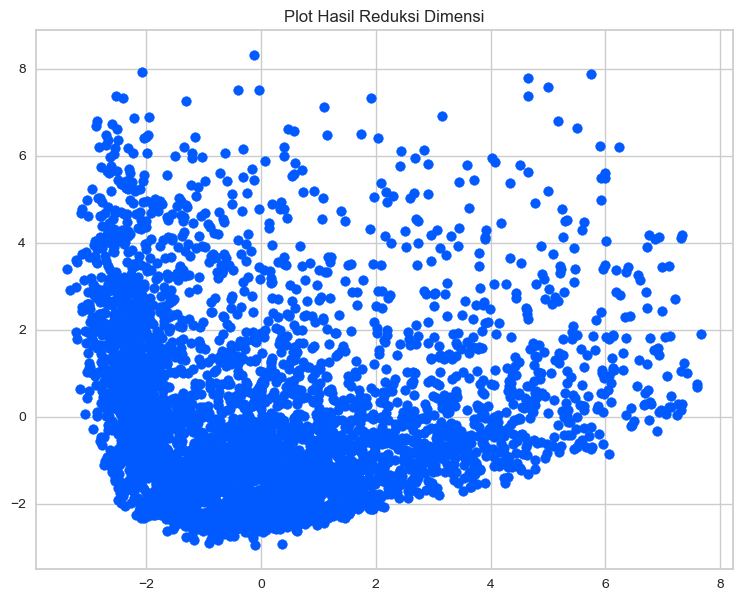

In [30]:
# Plot kedalam grafik
x =data_reduction["column1"]
y =data_reduction["column2"]
#To plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="#005aff", marker="o" )
ax.set_title("Plot Hasil Reduksi Dimensi")
plt.show()

# **Model Definition**

#### **K-Means**

Elbow Method


d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

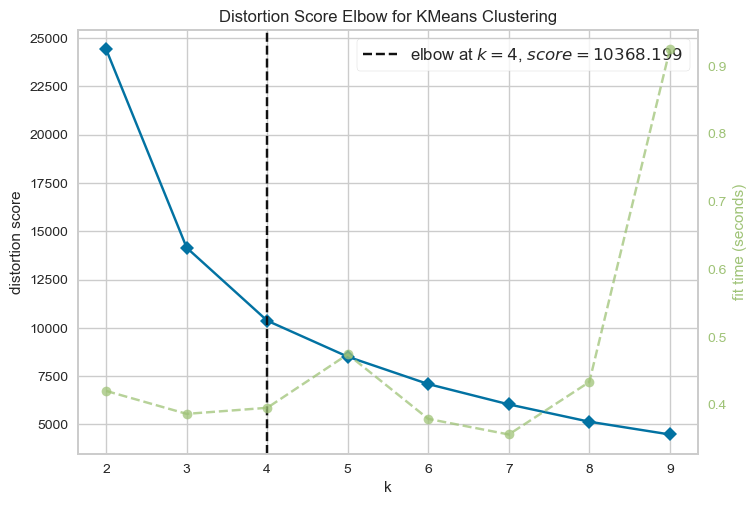

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Menggunakan elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_reduction)
Elbow_M.show()

berdasarkan elbow method didapatkan cluster terbaik adalah 4

In [32]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_reduction)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

In [33]:
silhouette_scores = [silhouette_score(data_reduction, model.labels_)
                     for model in kmeans_per_k[1:]]

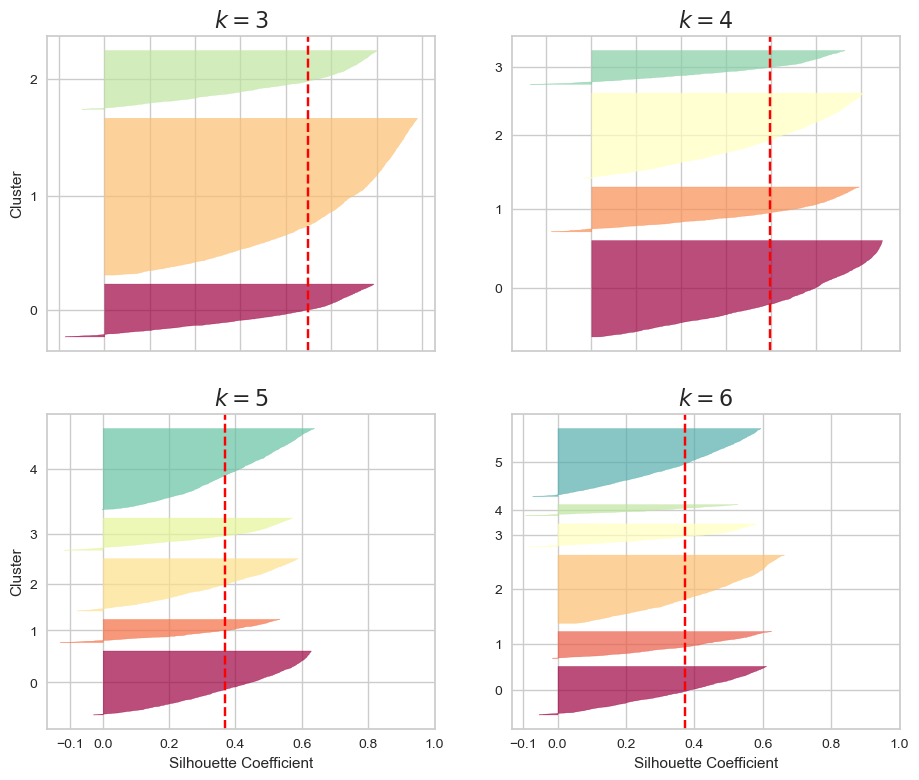

In [34]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_reduction, y_pred)

    padding = len(data_reduction) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

hasil analisa bahwa cliuster terbaik adalah cluster 4 karena pembagiannya lebih seimbang

# **Model Training**

In [35]:
# Elbow Method
model_kMeans_elbow = KMeans(4)
y_pred_kMeans_elbow = model_kMeans_elbow.fit_predict(data_reduction)

d:\Instalan\Anaconda\envs\jalan1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
data_reduction["Cluster"] = y_pred_kMeans_elbow
data_cleaned["Cluster"] = y_pred_kMeans_elbow

In [37]:
y_pred_kMeans_elbow

array([1, 1, 1, ..., 1, 1, 0])

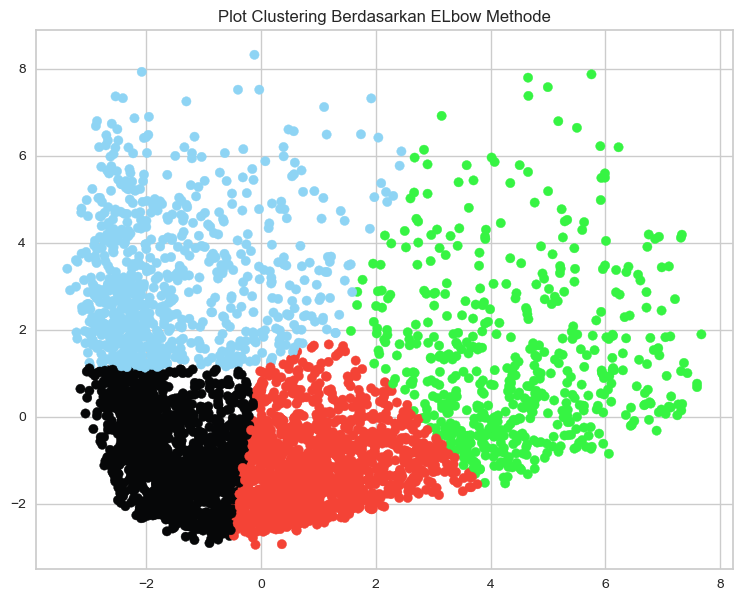

In [38]:
cmap = colors.ListedColormap(["#8ed4f4", "#060708", "#F44336","#36f443"])
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111, label='tes')
ax.scatter(x,y,s=45, c=y_pred_kMeans_elbow, marker='o', cmap=cmap)
ax.set_title("Plot Clustering Berdasarkan ELbow Methode")
plt.show()

In [39]:
data_reduction

,column1,column2,Cluster
0,-1.415187,-0.209285,1
1,-0.812821,-1.406658,1
2,-1.298369,-1.463275,1
3,-1.128857,-1.316777,1
4,-1.602483,-1.740411,1
...,...,...,...
4315,-2.350478,5.264646,0
4316,-3.012280,1.470063,0
4317,-2.717065,1.058626,1
4318,-2.804627,1.036856,1


# **Model Evaluation**

In [40]:
data_cleaned2["Cluster"] = y_pred_kMeans_elbow  # Menambahkan kolom Cluster ke DataFrame data_cleaned2
data_final = data_cleaned2  # Menyimpan DataFrame yang sudah diperbarui dalam variabel data_final

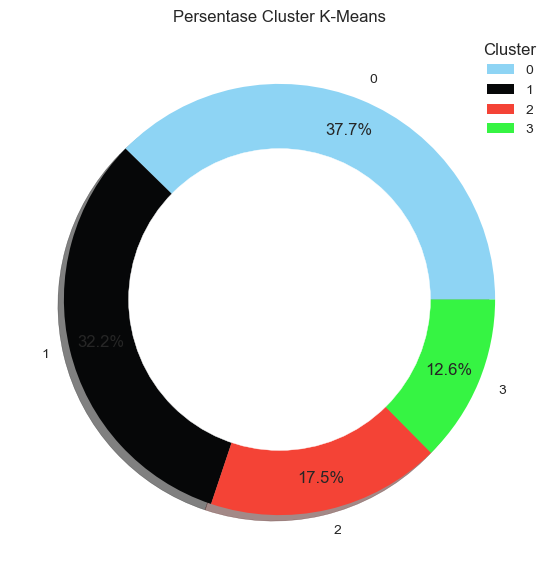

In [41]:
warna = ["#8ed4f4","#060708","#F44336","#36f443"]
sizes = dict(data_reduction["Cluster"].value_counts())

plt.figure(figsize=(10, 7))
plt.title("Persentase Cluster K-Means")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = warna)
plt.legend(title="Cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

di peroleh presentase tiap cluster adalah cluster 0 : 36.8%, cluster 1 : 32.9%, cluster 2 : 17.2%, cluster 3 : 13.1%

**Purchases vs Oneoff Purchases**

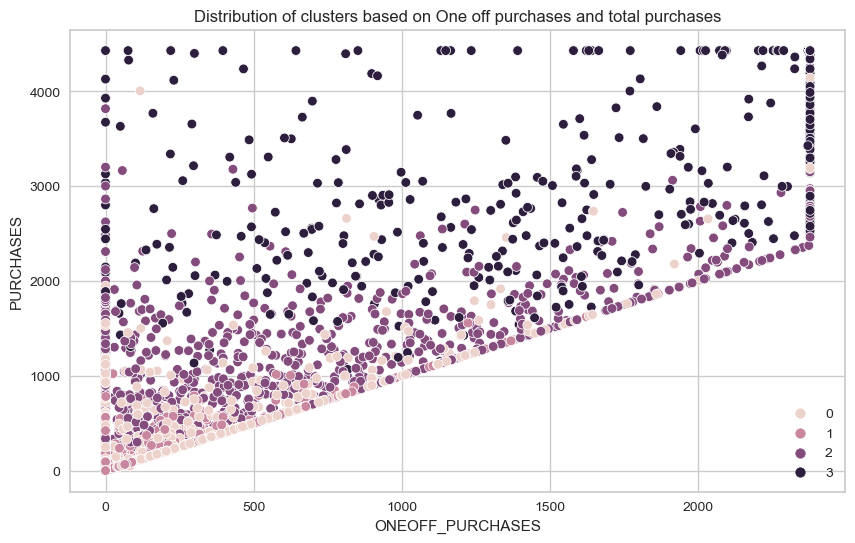

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_cleaned2, x='ONEOFF_PURCHASES', y='PURCHASES', hue=y_pred_kMeans_elbow)
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [43]:

# Menghitung rata-rata "ONEOFF_PURCHASES" dan "PURCHASES" untuk setiap cluster
oop_df = data_final.groupby('Cluster').agg({'ONEOFF_PURCHASES': 'mean', 'PURCHASES': 'mean'})

# Menghitung persentase untuk masing-masing rata-rata
a = (oop_df.loc[0, 'ONEOFF_PURCHASES'] / oop_df.loc[0, 'PURCHASES']) * 100
b = (oop_df.loc[1, 'ONEOFF_PURCHASES'] / oop_df.loc[1, 'PURCHASES']) * 100
c = (oop_df.loc[2, 'ONEOFF_PURCHASES'] / oop_df.loc[2, 'PURCHASES']) * 100
d = (oop_df.loc[3, 'ONEOFF_PURCHASES'] / oop_df.loc[3, 'PURCHASES']) * 100

# Membuat list persentase
persen = [a, b, c, d]

# Menambahkan kolom "Persentase" ke DataFrame "oop_df"
oop_df['Persentase'] = persen

# Menampilkan DataFrame "oop_df"
oop_df


,ONEOFF_PURCHASES,PURCHASES,Persentase
Cluster,,,
0,200.059736,329.819433,60.657353
1,115.330406,176.931156,65.183775
2,453.334400,958.182279,47.311916
3,1713.779191,3411.401085,50.236813


cluster 0 : Cluster ini memiliki nilai pembelian yang paling sedikit dari 3 cluster lainnya hanya sebesar 310 , dan sekitar 65% dari pembeliannya menggunakan metode pembayaran langsung. Dengan kata lain cluster ini sedikit melakukan pembelian dan lebih banyak menggunakan pembayaran kontan.

cluster 1 : Cluster ini memiliki nilai pembelian paling tinggi dan signifikan dibandingkan 4 cluster lainnya , dengan lebih dari setengah pembeliannya kontan. Dengan kata lain cluster ini melakukan banyak pembelian dan setengah lebih dari pengeluarannya itu dilakukan dengan cicilan. 

cluster 2 : Cluster ini memiliki nilai pengeluaran dan pembayaran kontan yang sedikit diatas cluster 0. Hampir setipe dengan cluster 0.

cluster 3 clster ini memiliki nilai pembelian tertinggi ke dua dari 4 cluster yang ada dan sekitar 47% pembeliannya menggunakan pembayaran langsung dan sisanya melakukan cicilan

**Purchases**

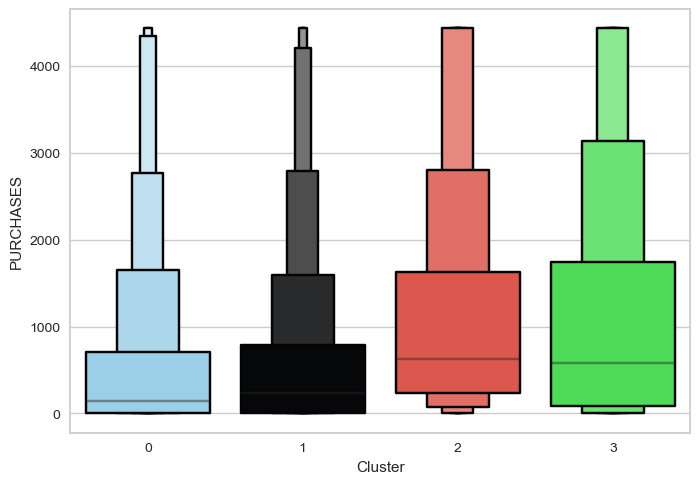

In [44]:
plt.figure()
grafik2=sns.boxenplot(x=data_reduction["Cluster"], y=data_cleaned2["PURCHASES"], palette=warna)
plt.show()

In [45]:
data_final.groupby(['Cluster']).agg({'PURCHASES': 'mean'})

,PURCHASES
Cluster,
0,329.819433
1,176.931156
2,958.182279
3,3411.401085


cluster 0 : paling sedikit melakukan purchase

cluster 1 : paling banyak melakukan purchase

cluster 2 : ketiga terbanyak melakukan purchase dari 4 cluster

cluster 3 kedua terbanyak melakukan purchase dari 4 cluster

**Minimum Payments**

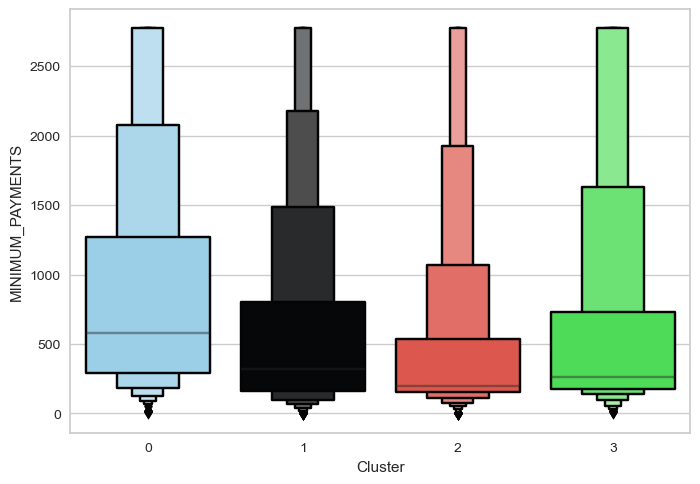

In [46]:
plt.figure()
grafik3=sns.boxenplot(x=data_reduction["Cluster"], y=data_cleaned2["MINIMUM_PAYMENTS"], palette=warna)
plt.show()

In [47]:
data_final.groupby(['Cluster']).agg({'MINIMUM_PAYMENTS': 'mean'})

,MINIMUM_PAYMENTS
Cluster,
0,1377.232155
1,403.025961
2,417.978784
3,946.261363


cluster 0 : paling sedikit melakukan minimum payment

cluster 1 : kedua terbanyak melakukan minimun payment

cluster 2 : paling banyak melakukan minimum payment

 cluster 3 : keketiga terbanyak melakukan minimun payment

**Balance**

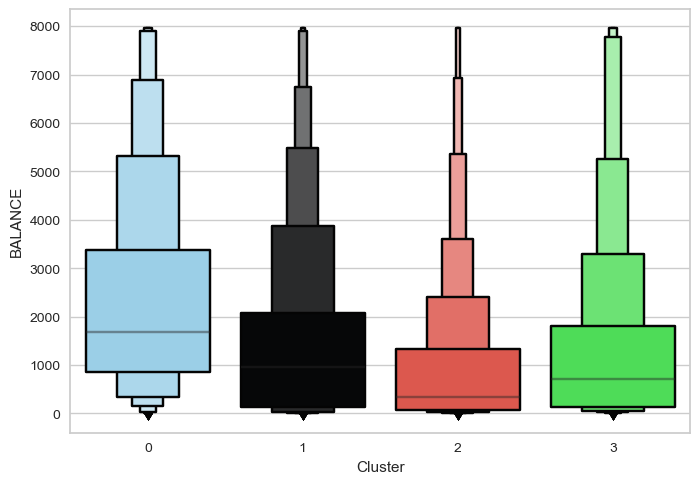

In [48]:
plt.figure()
grafik3=sns.boxenplot(x=data_reduction["Cluster"], y=data_cleaned2["BALANCE"], palette=warna)
plt.show()

In [49]:
data_final.groupby(['Cluster']).agg({'BALANCE': 'mean'})

,BALANCE
Cluster,
0,3980.938788
1,877.503621
2,676.721243
3,2489.161230


In [55]:
clusterprof=data_cleaned2.groupby('Cluster').mean()
clusterprof['Freq']=data_cleaned2['Cluster'].value_counts().sort_index()
clusterprof

,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Freq
Cluster,,,,,,,,,,,,,,,,,
0,0.241797,0.148422,3980.938788,0.971152,329.819433,200.059736,117.499894,3012.560190,0.108843,0.434436,9.713720,5.188654,6802.050852,2475.621330,1377.232155,0.022978,758
1,0.181885,0.111204,877.503621,0.871222,176.931156,115.330406,61.655452,514.558537,0.063558,0.109453,1.919484,2.682852,2926.697398,789.537482,403.025961,0.066928,1627
2,0.827385,0.634209,676.721243,0.937463,958.182279,453.334400,485.451725,119.593345,0.255599,0.026734,0.465133,17.253774,3904.162945,1109.946290,417.978784,0.233393,1391
3,0.944890,0.759993,2489.161230,0.984637,3411.401085,1713.779191,1159.802776,678.125218,0.643505,0.100329,2.189338,48.636029,7644.761029,3719.027597,946.261363,0.206137,544


cluster 0 : memiliki balance terbanyak dari 4 cluster

cluster 1 : memiliki balance ketiga terbanyak dari 4 cluster

cluster 2 : memiliki balance paling sedikit dari 4 cluster

cluster 3 memiliki balance kedua terbanyak dari 4 cluster

# **Model Inference**

#### **Save Model**

In [50]:
with open('model_kMeans_elbow.pkl', 'wb') as file_1:
    pickle.dump(model_kMeans_elbow, file_1)

#### **Load Model**

In [51]:
with open('model_kMeans_elbow.pkl', 'rb') as file_1:
    model_kMeans_elbow = pickle.load(file_1)

In [52]:
# Drop kolom cust_id
data_reduction.drop(columns=['Cluster'],axis=1, inplace=True)

In [53]:
# Melakukan prediksi menggunakan model terbaik
prediksi = model_kMeans_elbow.predict(data_reduction)
prediksi

array([1, 1, 1, ..., 1, 1, 0])

# **Kesimpulan**

#### **EDA**
- Semakin besar jumlah saldo untuk pembelian (balance) maka batasan kartu kredit akan semakin meningkat (credit limit)
- Terlihat bahwa tidak terdapat hubungan antara jumlah saldo yang dimiliki seseorang dengan jumlah pembalian yang dilakukan. Hal ini menunjukan kebanyakan pemilik credit card cenderung hemat dalam berbelanja.
- Terlihat bahwa semakin besar jumlah saldo yang dimiliki seseorang maka jumlah minimum pembayaran yang dilakukan juga tidak terlalu signifikant meningkat secara umum. Hal ini tentunya mendukung analisis kita terhadap grafik balance vs purchases
- Terlihat bahwa seseorang yang sering mengalami perubahan saldo (balance frequency) maka cenderung memiliki jumlah saldo semakin bertambah (balance)

# **Conceptual Problem**

**1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?** Inertia adalah radius untuk melakukan efaluasi model. Biasanya inertia yang baik ialah yang nilainya besar dan mirip

**2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !** Elbow Method adalah metode yang digunakan untuk membantu menentukan jumlah klaster yang optimal dalam algoritma K-Means. Metode ini dilakukan dengan mencoba beberapa nilai berbeda untuk jumlah klaster (biasanya dari 1 hingga k) dan memplot nilai inersi.
A. Alasan Penggunaan : 
- Membantu menemukan jumlah klaster yang optimal tanpa memerlukan pengetahuan sebelumnya tentang banyaknya klaster yang seharusnya ada.
- Memberikan visual tentang seberapa baik model K-Means bekerja untuk berbagai jumlah klaster tertentu.

B. Cara Penggunaan :
- Jalankan algoritma K-Means dengan berbagai nilai klaster.
- Hitung inersia untuk setiap konfigurasi klaster.
- Plot nilai inersia untuk setiap jumlah klaster.
- Dari grafik tersebut, temukan titik di grafik yang menyerupai siku (elbow).
- Lihat nilai K yang ada pada titik tersebut , nilai K tersebut yang optimal untuk digunakan.

C. Kelebihan & Kekurangan :
- Kelebihannya : Sederhana dan Memberikan visual sehingga memudahkan kita menentukan nilai K optimal.
- Kekurangan : Terkadang bentuk sikunya tidak terlalu terlihat jelas, Terkadang memerlukan interpretasi subjektif untuk menentukan lokasi siku.